공공 데이터 포탈(www.data.go.kr)에 있는 '국립정신건강센터 외래환자기초정보'의 데이터 2018년부터 2020년까지를 분석

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 폰트 나눔고딕으로 설정
from matplotlib import rc
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [39]:
# 파일 읽기
df2018_1 = pd.read_csv('../data/국립정신건강센터_외래환자기초정보_2018(상반기).csv')
df2018_2 = pd.read_csv('../data/국립정신건강센터_외래환자기초정보_2018(하반기).csv')
df2019 = pd.read_csv('../data/국립정신건강센터_외래환자기초정보_2019.csv')
df2020 = pd.read_csv('../data/국립정신건강센터_외래환자기초정보_2020.csv')

# 2018년 상반기 / 하반기 파일 합치기
df2018 = pd.concat([df2018_1, df2018_2], axis=0)
df2018 = df2018.reset_index(drop=True)

1-1. 2018년 데이터 가공

In [40]:
# 정규식
import re
year_reg = re.compile('^(19|20)\d{2}')
temp = df2018
temp['진료연도'] = 1
temp['진료월'] = 1

# 성별부분 남/여 -> M/F | 진료일 2018-12-22 -> 진료연도 : 2018 , 진료월 : 12
temp['성별'] = df2018.apply(lambda row : 'M' if row['성별'] == '남' else 'F', axis=1)
#temp['진료연도'] = df2018.apply(lambda row : year_reg.match(row['진료일자']).group() if year_reg.match(row['진료일자']) else 0, axis=1)
temp['진료연도'] = df2018['진료일자'].str.split('-').str.get(0)
temp['진료월'] = df2018['진료일자'].str.split('-').str.get(1)

# 타입변경
temp['진료연도'] = pd.to_numeric(temp['진료연도'])
temp['진료월'] = pd.to_numeric(temp['진료월'])

In [41]:
# 안쓰는 열 제거 + 데이터 합치기
temp = df2018.drop(['진료일자', '상병명', '보험유형'], axis=1)
df = temp

In [42]:
df

연령대 성별   상병코드  진료연도  진료월
0       40  M  F10.2  2018    1
1       30  F  F42.9  2018    1
2       30  F  F43.0  2018    1
3       40  M  F20.9  2018    1
4       50  M  F20.5  2018    1
...    ... ..    ...   ...  ...
83981   40  M  F25.2  2018   12
83982   40  M  F20.0  2018   12
83983   40  M  F20.9  2018   12
83984   40  M  F60.1  2018   12
83985   70  F  F20.5  2018   12

[83986 rows x 5 columns]

1-2. 2019년, 2020년 합치기

In [43]:
# 안쓰는 열 제거 + 데이터 합치기
temp = df2019.drop(['상병명', '보험유형'], axis=1)
# 2018년에 2019년 파일도 합치기
df = pd.concat([df, temp], axis=0)
df = df.reset_index(drop=True)

In [44]:
# 안쓰는 열 제거 + 데이터 합치기
temp = df2020.drop(['상병명', '보험유형'], axis=1)
# 2018년에 2019년 파일도 합치기
df = pd.concat([df, temp], axis=0)
df = df.reset_index(drop=True)

# 봄 여름 가을 겨울 나누기
df['진료계절'] = df.apply(lambda row : row['진료월']//3 if 3 <= row['진료월'] and row['진료월'] < 12 else 4, axis=1)
# 남 = 0 여 = 1
df['성별'] = df.apply(lambda row : 1 if row['성별'] == 'M' else 0, axis=1)

In [45]:
df

연령대  성별   상병코드  진료연도  진료월  진료계절
0        40   1  F10.2  2018    1     4
1        30   0  F42.9  2018    1     4
2        30   0  F43.0  2018    1     4
3        40   1  F20.9  2018    1     4
4        50   1  F20.5  2018    1     4
...     ...  ..    ...   ...  ...   ...
167276   60   0  R94.3  2020    1     4
167277   70   0  R94.3  2020    1     4
167278   70   0  R25.8  2020    1     4
167279   70   0  R25.8  2020    2     4
167280   70   0  R25.8  2020    2     4

[167281 rows x 6 columns]

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167281 entries, 0 to 167280
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   연령대     167281 non-null  int64 
 1   성별      167281 non-null  int64 
 2   상병코드    167281 non-null  object
 3   진료연도    167281 non-null  int64 
 4   진료월     167281 non-null  int64 
 5   진료계절    167281 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 7.7+ MB


In [47]:
df.describe()

연령대             성별           진료연도            진료월  \
count  167281.000000  167281.000000  167281.000000  167281.000000   
mean       38.908304       0.479917    2018.607307       5.513938   
std        19.387506       0.499598       0.676190       3.316787   
min         0.000000       0.000000    2018.000000       1.000000   
25%        20.000000       0.000000    2018.000000       3.000000   
50%        40.000000       0.000000    2018.000000       5.000000   
75%        50.000000       1.000000    2019.000000       8.000000   
max        90.000000       1.000000    2020.000000      12.000000   

                진료계절  
count  167281.000000  
mean        2.470191  
std         1.176278  
min         1.000000  
25%         1.000000  
50%         2.000000  
75%         4.000000  
max         4.000000

2. 수치형 데이터의 히스토그램 그리기

In [137]:
sns.set_palette("Paired")

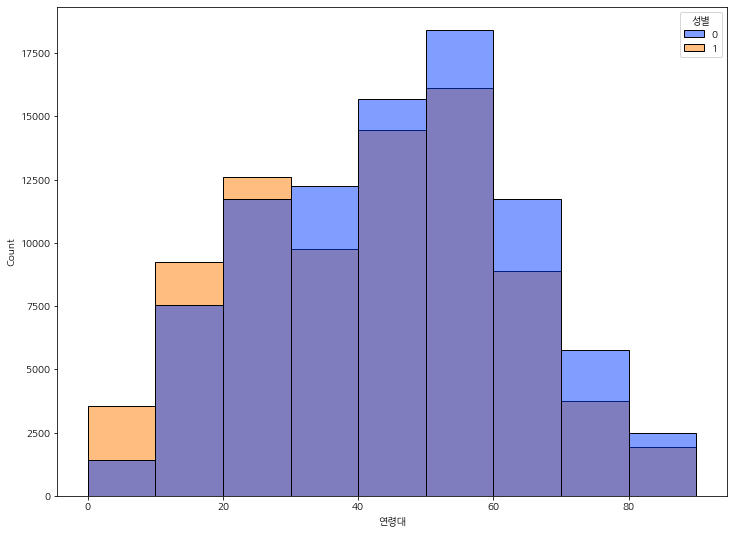

In [135]:
plt.figure(figsize=(12, 9))

sns.histplot(data=df, x='연령대', hue='성별', binwidth=10)

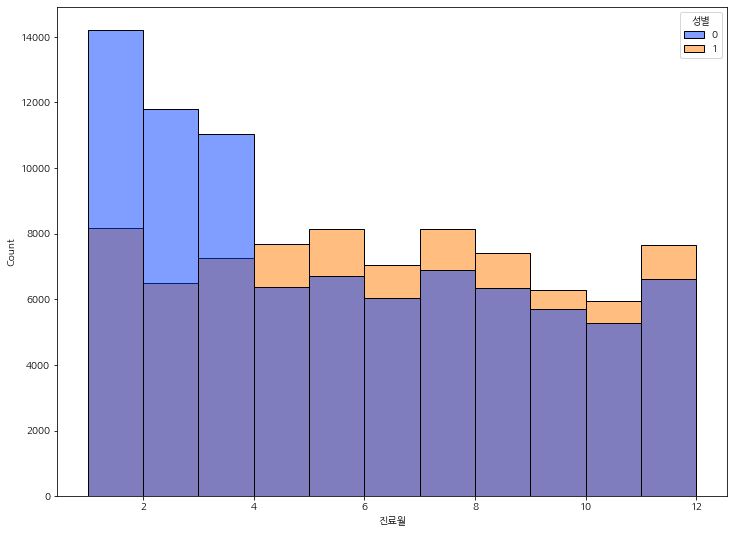

In [77]:
plt.figure(figsize=(12, 9))

sns.histplot(data=df, x='진료월', hue='성별', binwidth = 1)

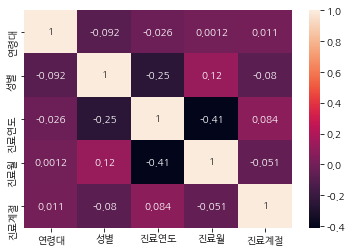

In [51]:
sns.heatmap(data=df.corr(), annot=True)

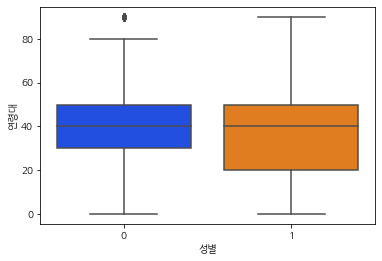

In [16]:
sns.boxplot(data=df, x='성별', y= '연령대')

3. 2차 데이터 가공

In [52]:
df

연령대  성별   상병코드  진료연도  진료월  진료계절
0        40   1  F10.2  2018    1     4
1        30   0  F42.9  2018    1     4
2        30   0  F43.0  2018    1     4
3        40   1  F20.9  2018    1     4
4        50   1  F20.5  2018    1     4
...     ...  ..    ...   ...  ...   ...
167276   60   0  R94.3  2020    1     4
167277   70   0  R94.3  2020    1     4
167278   70   0  R25.8  2020    1     4
167279   70   0  R25.8  2020    2     4
167280   70   0  R25.8  2020    2     4

[167281 rows x 6 columns]

In [123]:
# 기분(정동)장애 : F30 - F39
temp = df
temp = temp[temp['상병코드'].str.contains('F3')]


In [124]:
temp

연령대  성별   상병코드  진료연도  진료월  진료계절
7        70   0  F32.9  2018    1     4
18       60   1  F31.0  2018    1     4
27       60   0  F33.1  2018    1     4
39       20   0  F33.1  2018    1     4
52       60   1  F31.6  2018    1     4
...     ...  ..    ...   ...  ...   ...
163083   60   0  F33.4  2020    1     4
163084   60   0  F33.4  2020    3     1
163085   70   0  F33.4  2020    1     4
163086   50   0  F33.4  2020    1     4
163087   50   0  F33.4  2020    3     1

[37327 rows x 6 columns]

In [125]:
temp = temp.copy()
temp['상병코드'] = temp['상병코드'].str.split('F').str.get(1).str.split('.').str.get(0)
temp['상병코드'] = temp['상병코드'].astype(int)
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37327 entries, 7 to 163087
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   연령대     37327 non-null  int64
 1   성별      37327 non-null  int64
 2   상병코드    37327 non-null  int32
 3   진료연도    37327 non-null  int64
 4   진료월     37327 non-null  int64
 5   진료계절    37327 non-null  int64
dtypes: int32(1), int64(5)
memory usage: 1.9 MB


In [166]:
df_f3 = temp.copy()

d = df_f3['상병코드'] == 30
dd = df_f3[d]
dd

연령대  성별  상병코드  진료연도  진료월  진료계절
84       70   0    30  2018    1     4
2423     20   1    30  2018    1     4
3535     30   1    30  2018    1     4
5696     20   1    30  2018    1     4
7370     80   1    30  2018    2     4
...     ...  ..   ...   ...  ...   ...
159117   10   0    30  2020    1     4
159118   10   0    30  2020    1     4
159119   10   0    30  2020    2     4
159120   10   0    30  2020    3     1
159121   80   0    30  2020    2     4

[120 rows x 6 columns]

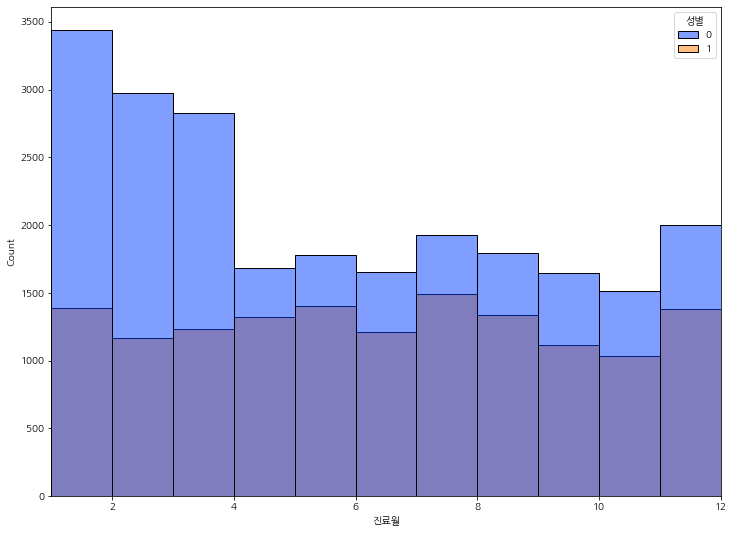

In [127]:
plt.figure(figsize=(12, 9))
sns.histplot(data=df_f3, x='진료월', hue='성별', binwidth = 1).set_xlim(1,12)
plt.show()


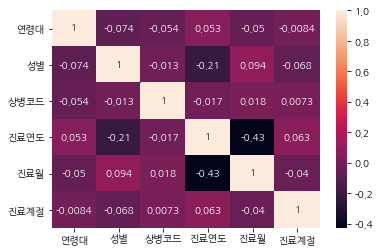

In [128]:
sns.heatmap(data=df_f3.corr(), annot=True)

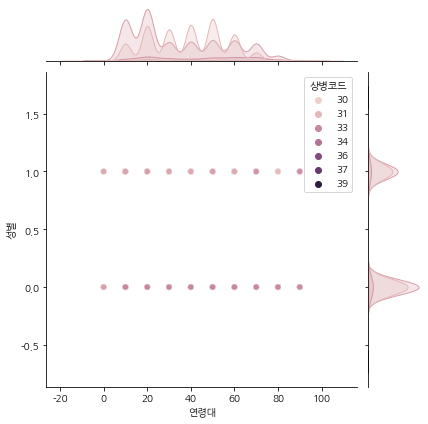

In [132]:
sns.jointplot(x='연령대', y='성별', hue='상병코드', data=df_f3, alpha=0.3)

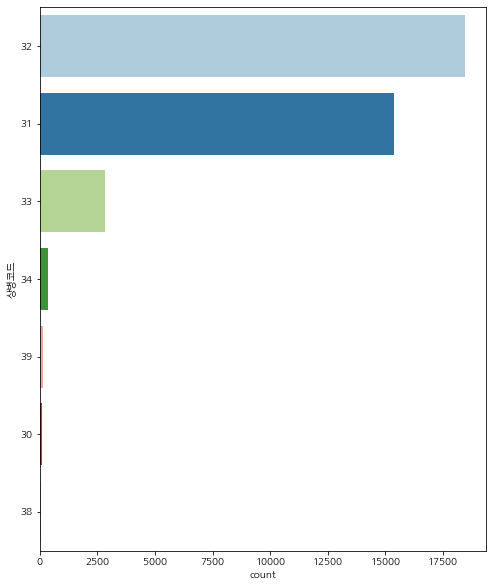

In [138]:
fig = plt.figure(figsize=(8, 10))
sns.countplot(y='상병코드', data=df_f3.fillna('n/a'), order=df_f3.fillna('n/a')['상병코드'].value_counts().index)